<a href="https://colab.research.google.com/github/kiiru60/StockPrice_prediction/blob/master/stocks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#installing dependencis 
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
from pandas_datareader import data as web


In [0]:
!pip install ta

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=550b94ddc5fa1703ae59bfbc8f1cdcdc2cc2bedfbbb7a65a33cde69400ae55e9
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [0]:
import ta
from ta.utils import dropna

In [0]:
#reading stock data from yahoo
end = dt.datetime.now()
#start = dt.datetime(end.year-2, end.month, end.day)
start = dt.datetime(2019, 1, 1)
df = web.DataReader("FB", 'yahoo', start, end)
df.to_csv('APPL.csv')
df.head(8)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
2019-01-09,144.699997,141.270004,142.949997,144.229996,22205900,144.229996
2019-01-10,144.559998,140.839996,143.080002,144.199997,16125000,144.199997
2019-01-11,145.360001,142.570007,143.149994,143.800003,12908000,143.800003


In [0]:
# number of trading days 
df.shape
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,354.000000,354.000000,354.000000,354.000000,3.540000e+02,354.000000
mean,187.806158,183.289379,185.524378,185.689746,1.815402e+07,185.689746
std,19.627701,19.948187,19.857914,19.746794,9.420934e+06,19.746794
min,137.169998,128.559998,128.990005,131.740005,6.046300e+06,131.740005
25%,175.012501,169.967503,173.754997,173.412495,1.196078e+07,173.412495
50%,188.779999,184.165001,186.639999,186.600006,1.538145e+07,186.600006
75%,201.150005,197.130001,199.639996,198.932503,2.143178e+07,198.932503
max,240.899994,231.669998,239.770004,234.910004,7.723360e+07,234.910004


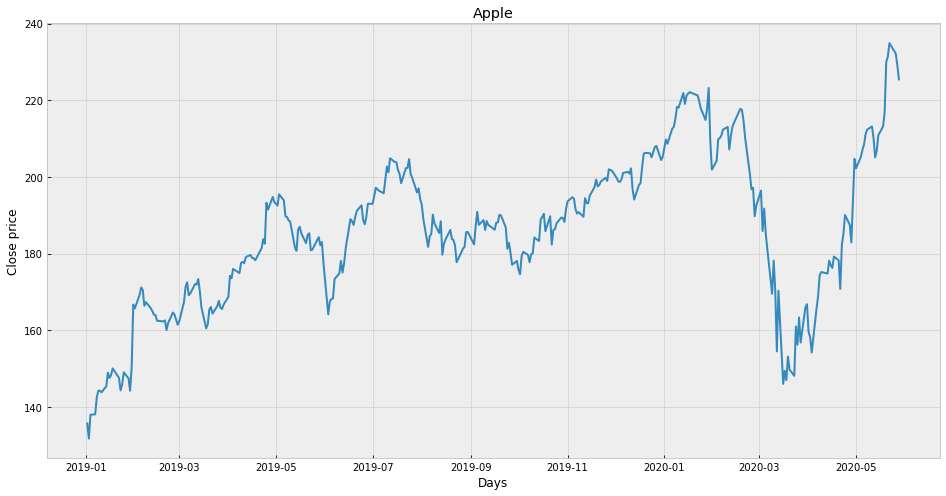

In [0]:
# visualize data 
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.show()

In [0]:
#get the close price 
df= df[['Close']]
df.head(8)


,Close
Date,
2019-01-02,135.679993
2019-01-03,131.740005
2019-01-04,137.949997
2019-01-07,138.050003
2019-01-08,142.529999
2019-01-09,144.229996
2019-01-10,144.199997
2019-01-11,143.800003


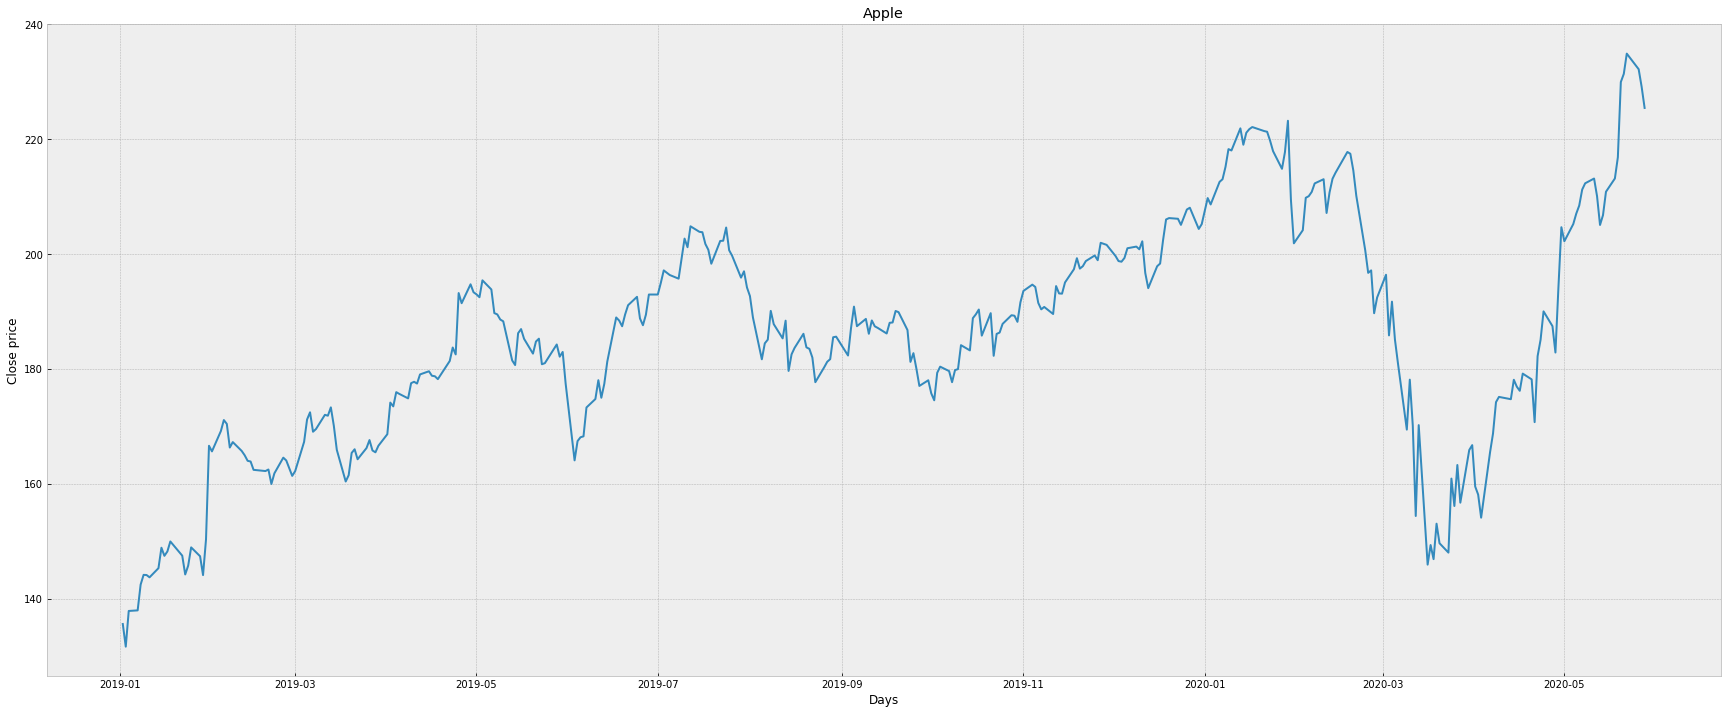

In [0]:
plt.figure(figsize=(30,12))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])

In [0]:
macd = ta.trend.MACD(close=df['Close'], n_slow=26, n_fast= 12,n_sign=9)
df['MACD'] = macd.macd_diff()

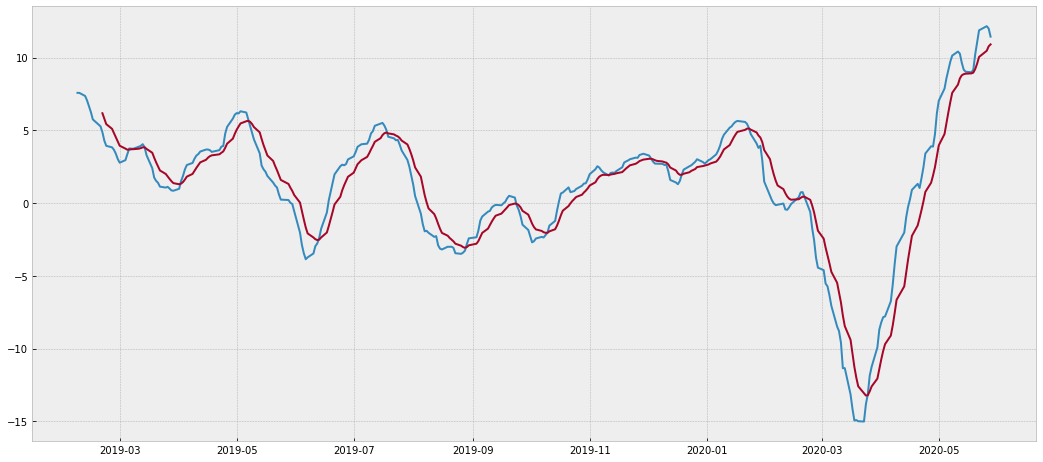

In [0]:
plt.figure(figsize=(18,8))
plt.plot(macd.macd())
plt.plot(macd.macd_signal())

In [0]:
#macd  trading 
def handle_data(df):
  mcdata=close=df['Close']
  macd, macdsignal, macdhist = ta.trend.MACD(mcdata, 12, 26, 9)
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1
  for i in range(len(df)):
    if macdsignal[-1]<macd[-1]:
      if flag!=1:
        sigPriceBuy.append(df[i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif macdsignal[-1]> macd[-1]:
      if flag!=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df[i])
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
       sigPriceBuy.append(np.nan)
       sigPriceSell.append(np.nan)
  return(sigPriceBuy,sigPriceSell)
  
 
  

In [0]:
#store the but and sells data
buy_sell= handle_data(df)
df['buy_signal']=buy_sell[0]
df['sell_signal']=buy_sell[1]


TypeError: ignored

In [0]:
exp1=ta.trend.EMAIndicator(close=df['Close'], n = 20, fillna = 'magenta')
exp2=ta.trend.EMAIndicator(close=df['Close'], n = 25, fillna = 'yellow')
exp3=ta.trend.EMAIndicator(close=df['Close'], n = 30, fillna = False)
exp4=ta.trend.EMAIndicator(close=df['Close'], n = 35, fillna = False)
exp5=ta.trend.EMAIndicator(close=df['Close'], n = 40, fillna = False)
exp6=ta.trend.EMAIndicator(close=df['Close'], n = 45, fillna = False)
exp7=ta.trend.EMAIndicator(close=df['Close'], n = 50, fillna = False)
exp8=ta.trend.EMAIndicator(close=df['Close'], n = 55, fillna = False)

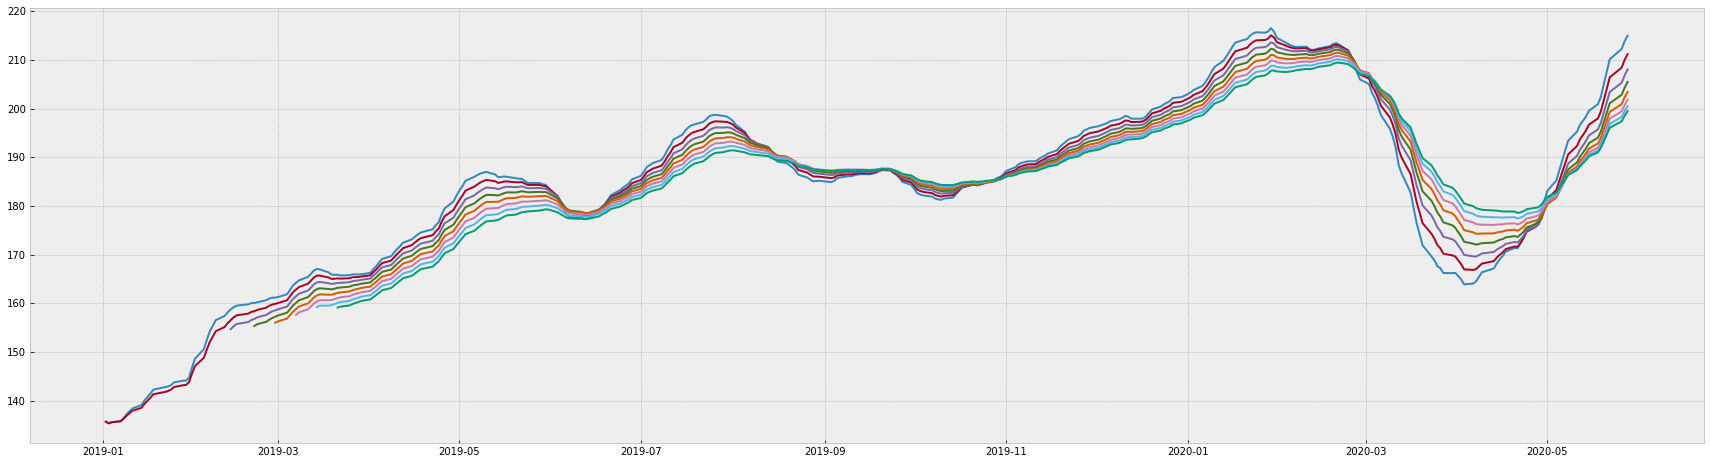

In [0]:
plt.figure(figsize=(30,8))
plt.plot(exp1.ema_indicator())
plt.plot(exp2.ema_indicator())
plt.plot(exp3.ema_indicator())
plt.plot(exp4.ema_indicator())
plt.plot(exp5.ema_indicator())
plt.plot(exp6.ema_indicator())
plt.plot(exp7.ema_indicator())
plt.plot(exp8.ema_indicator())
plt.show()
#plt.plot(macd.macd_signal())

In [0]:
# predict future 
ftr_days=30
#create a new column on the data 
df['predict']=df[['Close']].shift(-ftr_days)
df.tail(4)

,Close,predict
Date,,
2020-05-19,313.140015,NaN
2020-05-20,319.230011,NaN
2020-05-21,316.850006,NaN
2020-05-22,318.890015,NaN


In [0]:
# want to create a data set with prediction and remove last predicted rows
x=np.array(df.drop(['predict'],1))[:-ftr_days]
print(x)

[[  1.71285713]
 [  1.69214284]
 [  1.67928576]
 ...
 [259.42999268]
 [266.07000732]
 [267.98999023]]


In [0]:
#create target data set(y) and covert into numpy array and get all target values except x rows
y=np.array(df['predict'])[:-ftr_days]
print(y)


[  1.39571428   1.43571424   1.46714282 ... 319.23001099 316.8500061
 318.89001465]


In [0]:
# split the data into 75% train and 25% test
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size= 0.25)

In [0]:
# models 
#decison tree regressor model
tree= DecisionTreeRegressor().fit(x_train,y_train)
#create the regression meodel
lmodel=LinearRegression().fit(x_train,y_train)


In [0]:
# get the last rows of the feature data set
x_future= df.drop(['predict'],1)[:-ftr_days]
x_future=x_future.tail(ftr_days)
x_future=np.array(x_future)
x_future

array([[273.35998535],
       [298.80999756],
       [289.32000732],
       [302.73999023],
       [292.92001343],
       [289.02999878],
       [266.17001343],
       [285.33999634],
       [275.42999268],
       [248.22999573],
       [277.97000122],
       [242.21000671],
       [252.86000061],
       [246.66999817],
       [244.77999878],
       [229.24000549],
       [224.36999512],
       [246.88000488],
       [245.52000427],
       [258.44000244],
       [247.74000549],
       [254.80999756],
       [254.28999329],
       [240.91000366],
       [244.92999268],
       [241.41000366],
       [262.47000122],
       [259.42999268],
       [266.07000732],
       [267.98999023]])

In [0]:
# show model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)

[273.25       287.04998779 284.42999268 313.04998779 282.79998779
 276.92999268 316.8500061  320.02999878 324.33999634 282.97000122
 308.66000366 265.57998657 287.73001099 293.79998779 289.07000732
 293.16000366 297.55999756 300.63000488 303.73999023 319.23001099
 315.01000977 311.41000366 307.6499939  309.54000854 289.07000732
 309.54000854 313.14001465 319.23001099 316.8500061  318.89001465]


In [0]:
#show model liner regression prediction
Linear_predict=lmodel.predict(x_future)
print(Linear_predict)

[278.55966481 304.42522509 294.7802822  308.41938673 298.43906924
 294.48553839 271.25229494 290.73528555 280.66347124 253.01935244
 283.24495307 246.90106898 257.72495609 251.43388322 249.5130239
 233.71929344 228.76976548 251.64731893 250.26511221 263.39606825
 252.52136164 259.70679261 259.1782977  245.57983946 249.6654669
 246.08800347 267.4918689  264.40222306 271.15065594 273.10198835]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


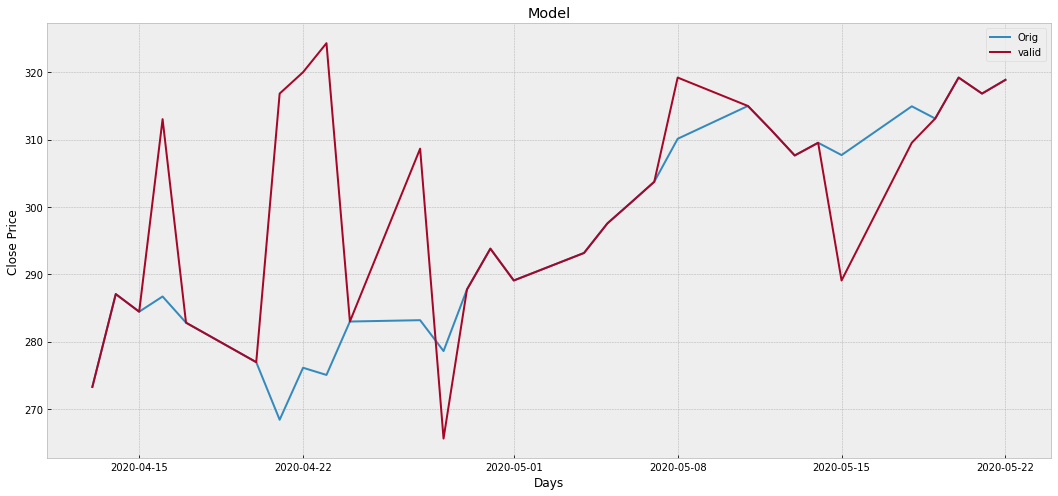

In [0]:
#visualizing predicted data 
predictions= tree_prediction
valid=df[x.shape[0]:]
valid['predictions']= predictions 
plt.figure(figsize=(18,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(valid[['Close','predictions']])
plt.legend(['Orig','valid','predictions'])
plt.show()